# **Decision Trees**

<img src="fubuki.jpg" alt="My Screenshot" width="450" >

Hello everyone, I am a self-taught data scientist, i share what i have learned, today's topic is decision trees. Hope you guys can also gain some insights along with me.

## **What are decision trees????**
-> Decision trees are **`non-parametric`** **`supervised`** machine learning algorithms that can be employed for BOTH **`regression`** and **`classification`** tasks. They are robust machine learning algoritthms and widely used in today's context.

Visually, they can be represented as upside-down trees.

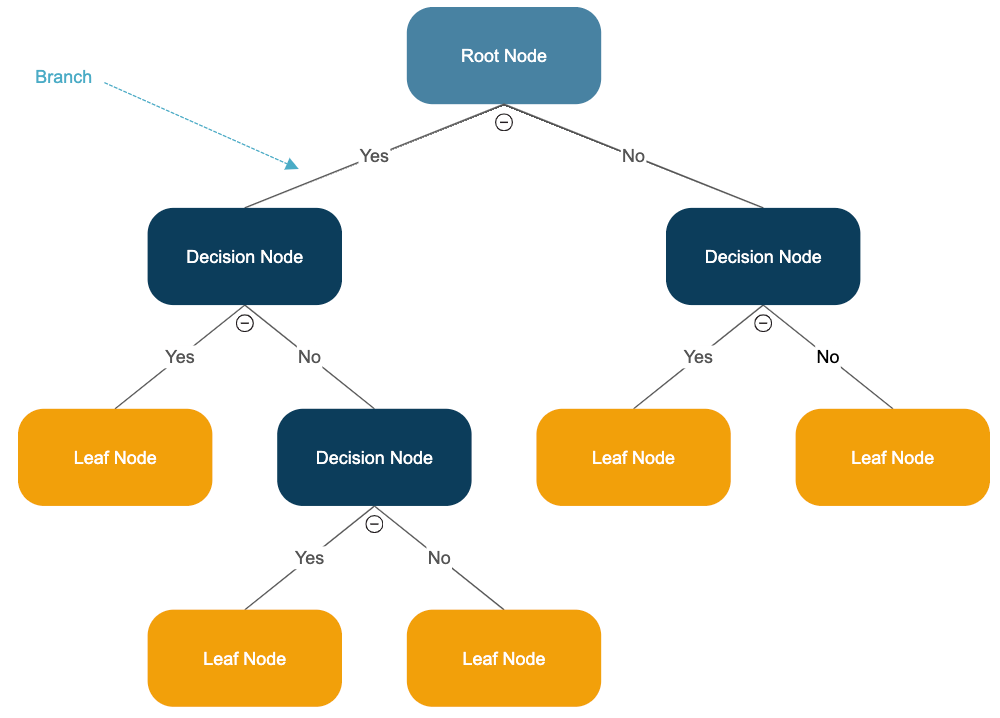

**Root node**:
- Starting point of the decision tree.
- Created by dividing (splitting) the data based on a condition related to  a *specific* feature.

**Decision node**:
- Lies between root and leaves.
- Test the data on a *specific* feature -> split the data into 2 (or more) subsets based on the test result.
- Represent the **decision rule**.

**Leaf node (Internal node)**:
- Contain a class or regression value.

# **Lets build a decision tree and visulize to understantd the process.**`
We will use the iris dataset in this example

## **Import dependencies**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
import pandas as pd
import numpy as np

## **Load dataset**

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 3)   # max_depth is a param that we will discuss later on
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# if youre not familiar with the iris dataset, this cell would give you details about this dataset.

iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target']=iris.target     # 0 = Iris-setosa
                                  # 1 = Iris-versicolor
                                  # 2 = Iris-virginica

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## **Visualization**

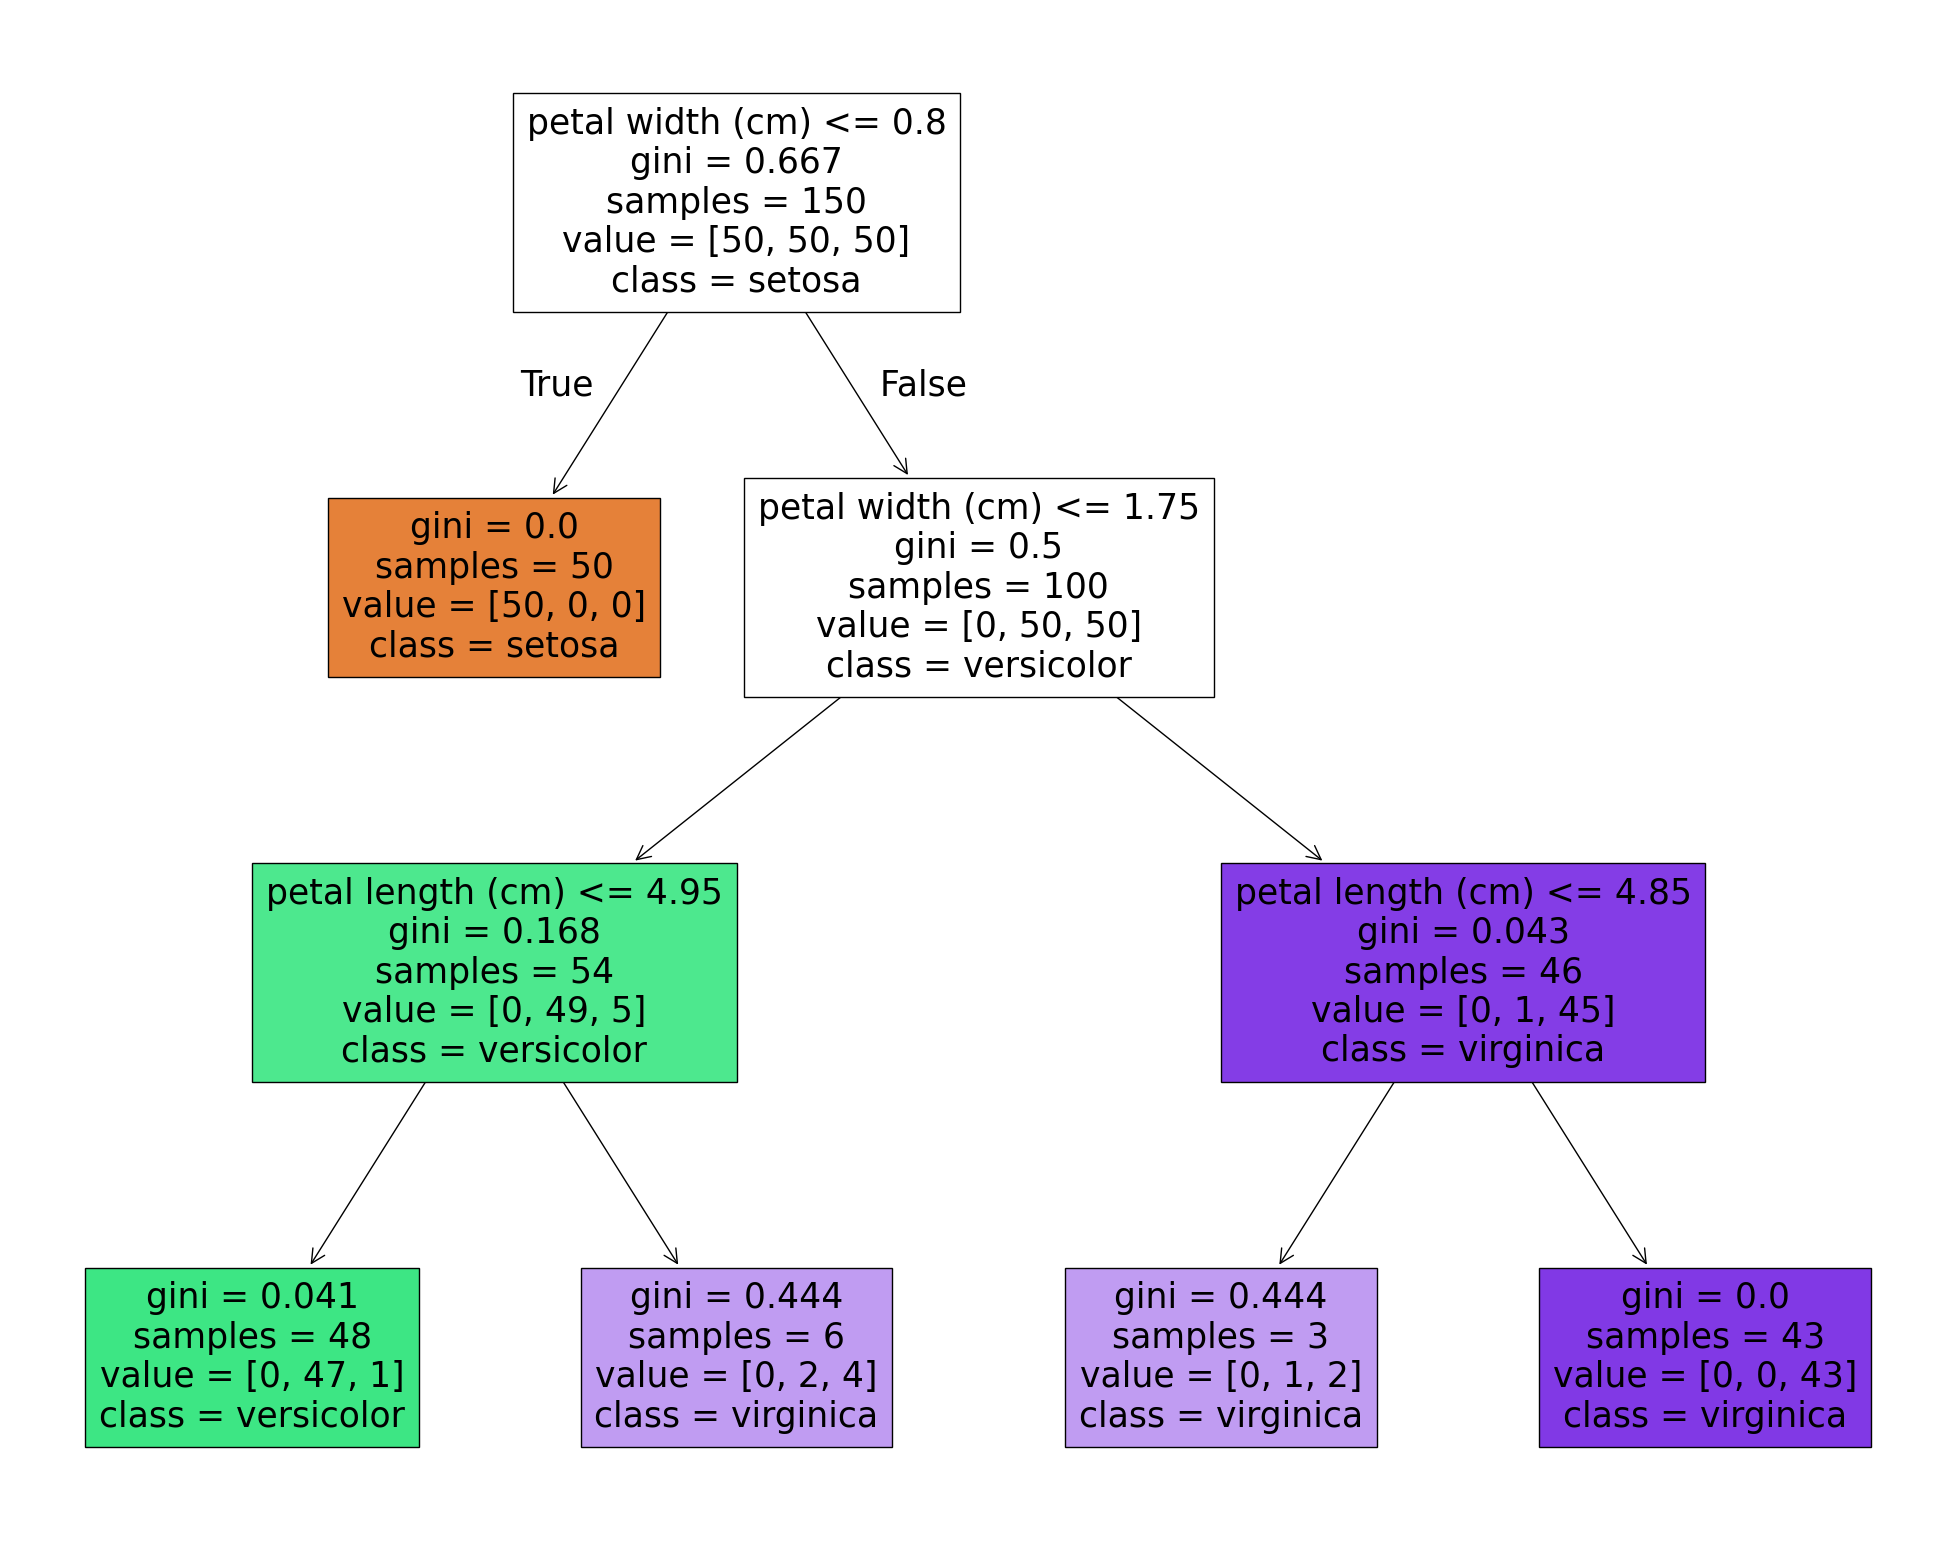

In [ ]:
plt.figure(figsize=(25,20))
d = tree.plot_tree(tree_clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

To better understand how a decision tree works, we begin at the **root node** (depth 0). This node checks if the **petal length** (cm) is less than or equal to **2.45**. If true, we move to the **left child node** of the root (depth 1, left). This node is a **leaf**, meaning no further questions are asked, and it classifies all samples with petal lengths of **2.45 or less** as the "**setosa**" species.

If the petal length is greater than **2.45**, we examine the **right child node** of the root (depth 1, right), where a new question is asked: **"Is the petal width (cm) greater than 1.75?"** This leads us to further decision nodes (depth 2), which ask more questions, eventually reaching **leaf nodes** that classify the data.

In each node, the **"Samples"** value indicates the number of examples present at that node, and the **"value"** list shows the class of those examples. For instance, at the **left node** at depth 1, we have **50 samples**, and all **50** belong to the **first class** (**setosa**).

To dive deeper into how decision trees work, we need to answer some key questions:

- **How does the tree decide which feature to ask about?** For example, why did it choose **petal length** at the root node instead of **sepal width** or **petal width**?
- **How does it decide which feature value to ask about?** For instance, why was **2.45** chosen over values like **1.7** or **2.3**?
- **What is the Gini value, and why is it important?**

# **Parameters of Decision Tree**

## **1. `Gini Index`**

### Definition:
The **Gini Index** is a measure of splitting quality. It assesses how **heterogeneous** (mixed) a dataset is.

### Goal:
We want the **Gini Index** to be as **low** as possible.

### Interpretation:
- **Gini = 0**: This is ideal. The node is perfectly "pure," meaning all examples in the node belong to the same class.
- A **higher Gini value** means the node is more **mixed**.

### Range:
The **Gini Impurity** ranges between **0** and **0.5**.

### Formula:
$$
Gini = 1 - \sum_{i=1}^{n} (p_i)^2
$$
Where:
- **n** is the number of classes, and
- **p_i** is the percentage of each class in the node.

### Example Calculation:
Let's look at the node at **depth 2, left**, which has `value = [0, 49, 5]` and `samples = 54`.

- **$p_1$** (class 0) = 0/54
- **$p_2$** (class 1) = 49/54
- **$p_3$** (class 2) = 5/54

Now, calculate the Gini value:
$$
Gini = 1 - \left[ \left(\frac{0}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2 \right] \approx 0.168
$$
(This matches the **Gini = 0.168** value shown on the node).


## **2. `Entropy Index`**
### Definition:
**Entropy** can be defined as a measure of the **disorder** of a system. In our case, it is the measure of **impurity** in a split.

### Range:
**Entropy** ranges from **0** to **1**.

### Interpretation:
- **Entropy = 0**: The node is perfectly "pure."
- **Entropy = 1**: The node has maximum disorder (all classes are equally distributed).

### Formula:
$$
Entropy(S) = \sum_{i=0}^{n} -p_i \log_2(p_i)
$$
Where:
- **n** is the number of classes and
- **p_i** is the percentage of class **i**.

### Example Calculation:
Using the same node (`value = [0, 49, 5]` and `samples = 54`):

$$
Entropy = - \left[ \left(\frac{0}{54}\right) \log_2\left(\frac{0}{54}\right) + \left(\frac{49}{54}\right) \log_2\left(\frac{49}{54}\right) + \left(\frac{5}{54}\right) \log_2\left(\frac{5}{54}\right) \right] \approx 0.445
$$

### Usage in sklearn:
To use **Entropy** in sklearn, simply set the parameter `criterion="entropy"`.


## **3. `Information Gain`**

### How Gini or Entropy Decide the Split:
Gini and Entropy are used to calculate **Information Gain**, which helps decide how to split the data.

### Definition:
**Information Gain** measures how well a feature can **split** or **classify** a dataset.

### How it works:
At each node, the algorithm calculates the **Information Gain** for every possible feature and every possible threshold. It will choose the split that results in the **highest Information Gain**.

### Formula (Using Entropy):
$$
Gain(S,A) = Entropy(S_{\text{parent}}) - \sum_{i \in \text{children}} \frac{|S_i|}{|S_{\text{parent}}|} Entropy(S_i)
$$
In words:
- **Gain** = (Entropy of the parent node) - (Weighted average of the Entropy of the child nodes).

### Example Calculation:
Let's calculate the gain for the split at **depth 1, right** (the node with **entropy = 1.0** and **samples = 100**). It splits into two child nodes:

- **Left child**: entropy = **0.445**, samples = **54**
- **Right child**: entropy = **0.151**, samples = **46**

Now, calculate the **Information Gain**:

$$
Information Gain = 1.0 - \left[ \left(\frac{54}{100}\right) \times 0.445 + \left(\frac{46}{100}\right) \times 0.151 \right] \approx 0.69
$$

This value of **0.69** indicates that this split significantly reduced the **uncertainty** (disorder).


# **Fine-Tuning the Model (Key Parameters)**

One of the main disadvantages of Decision Trees is that they can create over-complex trees that Overfit the data (they learn the training data too well but don't generalize).

To control this, we use several key hyperparameters:


## **1. `max_depth`**

This parameter determines the maximum depth the tree can grow.

A larger `max_depth` creates a more complex tree, which increases the risk of overfitting.

## **2. `min_samples_split`**

This sets the *minimum number* of samples a node must have in order to be split further.

If a node has fewer samples than this number, it will become a leaf node. This helps reduce overfitting.

## **3. `max_features`**

This determines the *maximum number* of features to consider at each split.

**For example**, if our dataset has 50 features and we set `max_features = 10`, the model will randomly select 10 features at each split and find the best split only from those 10. This is another technique to prevent overfitting.

## 4. `class_weight`**

This is very important for handling **imbalanced datasets**.

If some classes have very few examples, you can use class_weight to assign more weight to these minority classes, forcing the model to pay better attention to them.

**Usage**:


`class_weight="balanced"`: Automatically calculates weights inversely proportional to class frequency.

Manual: `class_weight={0: 1, 1: 2}` (e.g., giving class 1 twice the importance of class 0).

## **5. `sample_weight`**

This parameter determines the importance of each individual example (data point).

Instead of weighting a whole class, you weight a specific sample.

**For example**:

Example 1 (Patient A): He/she has a critical condition, and accurate diagnosis is crucial.

Example 2 (Patient B): He/she has a less critical condition, and accurate diagnosis is important but not
a top priority.

By using sample_weight , you can assign higher weight to Example 1, which helps the model pay more attention to diagnosing critical cases.

# **Pros & Cons**

| **Advantages**                                     | **Disadvantages**                                      |
|----------------------------------------------------|--------------------------------------------------------|
| **Simple to understand and interpret**: Trees can be visualized. | **Prone to Overfitting**: Trees can become over-complex. Mechanisms like pruning or setting parameters (max_depth, min_samples_split) are necessary to avoid this. |
| **Requires little data preparation**: Unlike other techniques, it often doesn't require data normalization. | **Unstable**: Small variations in the data can result in a completely different tree being generated. |
| **Handles mixed data**: Can work with both numerical and categorical data. | **Poor at extrapolation**: Predictions are not smooth or continuous; they are piecewise constant approximations. |
| **"White box" model**: The explanation for a decision is easily explained by boolean logic (If-Then rules). | **Locally optimal**: Learning the globally optimal decision tree is an NP-complete problem. Practical algorithms make locally optimal decisions, which cannot guarantee the single best tree. |
|                                                    | **Biased with imbalanced data**: Trees become biased if some classes dominate. It is recommended to balance the dataset before fitting. |


Thats all~~, good luck on ur data science career!!